In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns
from datetime import datetime
import yfinance as yf
yf.pdr_override()

c:\Users\cptfr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

# Lista de tickers
tickers = ["PETR4.SA", 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']

# Baixando os dados dos tickers
carteira = yf.download(tickers, start="2002-01-01",end="2023-12-31")['Adj Close']

# Baixando os dados do índice Ibovespa
ibov = yf.download('^BVSP', start="2002-01-01",end="2023-12-31")['Adj Close']


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
carteira

,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,,,
2002-01-01,0.263994,1.026872,1.617727,1.571674,1.896705
2002-01-02,0.268730,1.026872,1.691355,1.574747,1.860231
2002-01-03,0.272968,1.034691,1.672880,1.585502,1.889410
2002-01-04,0.266736,1.030782,1.645396,1.575669,1.929533
2002-01-07,0.260753,1.034691,1.627103,1.610083,1.929533
...,...,...,...,...,...
2024-04-26,27.379999,12.183015,32.191872,39.914928,62.220001
2024-04-29,27.549999,12.372750,31.942011,40.394100,63.900002
2024-04-30,27.420000,12.342792,31.342350,40.269516,63.290001


In [4]:
ibov

Date
2002-01-02     13872.000000
2002-01-03     14265.000000
2002-01-04     14332.000000
2002-01-07     14379.000000
2002-01-08     14168.000000
                  ...      
2024-04-26    126526.000000
2024-04-29    127352.000000
2024-04-30    125924.000000
2024-05-02    127122.000000
2024-05-03    128508.671875
Name: Adj Close, Length: 5532, dtype: float64

<AxesSubplot:xlabel='Date'>

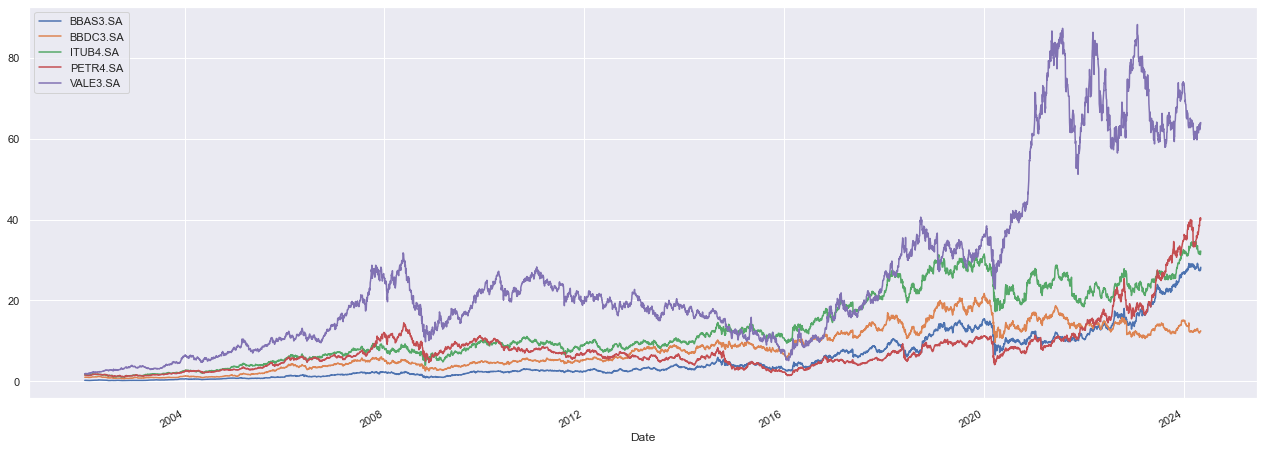

In [5]:
sns.set()
carteira.plot(figsize=(22,8))

Carteira dividido pela primeira cotação

In [6]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
ibov_normalizado = (ibov / ibov.iloc[0])*50000

<AxesSubplot:xlabel='Date'>

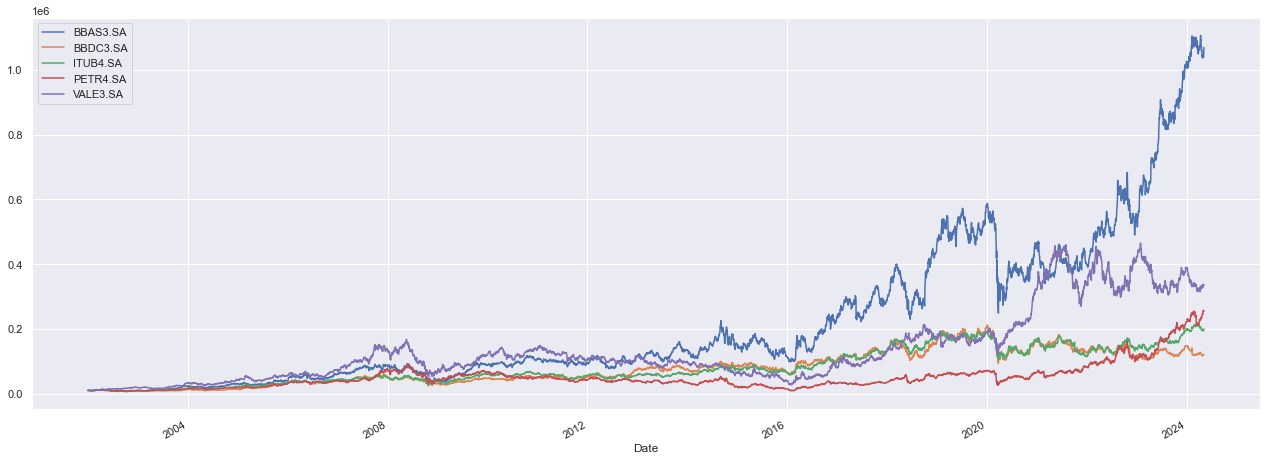

In [7]:
carteira_normalizada.plot(figsize=(22,8))

In [8]:
carteira_normalizada['saldo']= carteira_normalizada.sum(axis=1)
carteira_normalizada

,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,saldo
Date,,,,,,
2002-01-01,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5.000000e+04
2002-01-02,1.017941e+04,10000.000000,10455.134400,10019.553014,9807.698133,5.046180e+04
2002-01-03,1.033995e+04,10076.140936,10340.929850,10087.982114,9961.538495,5.080654e+04
2002-01-04,1.010387e+04,10038.076272,10171.035281,10025.416870,10173.079599,5.051148e+04
2002-01-07,9.877244e+03,10076.140936,10057.959651,10244.383467,10173.079599,5.042881e+04
...,...,...,...,...,...,...
2024-04-26,1.037145e+06,118642.010136,198994.502403,253964.427153,328042.600728,1.936788e+06
2024-04-29,1.043584e+06,120489.712940,197449.984617,257013.225798,336900.068721,1.955437e+06
2024-04-30,1.038660e+06,120197.965504,193743.172586,256220.541063,333683.961637,1.942505e+06


In [9]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2002-01-02     50000.000000
2002-01-03     51416.522491
2002-01-04     51658.016148
2002-01-07     51827.422145
2002-01-08     51066.897347
                  ...      
2024-04-26    456048.154556
2024-04-29    459025.374856
2024-04-30    453878.316032
2024-05-02    458196.366782
2024-05-03    463194.463217
Name: Adj Close, Length: 5532, dtype: float64

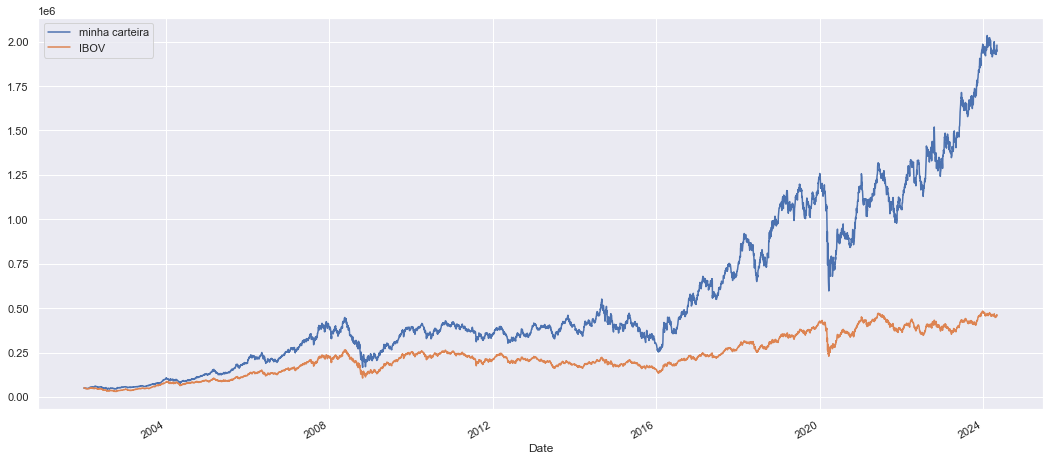

In [10]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label='minha carteira')
ibov_normalizado.plot(label="IBOV")
plt.legend()